In [3]:
import pandas as pd


data = pd.read_csv('C:/Users/HOME/Desktop/python/Projects/p1/data/raw/sample_sales_data_with_issues.csv')


print(data.head())
print(data.shape)
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

   Order ID  Order Date Customer ID   Product     Category  Quantity Ordered  \
0      1001  2023-01-01        C001    Laptop  Electronics               1.0   
1      1002  2023-01-02        C002   Monitor  Electronics               2.0   
2      1003  2023-01-02        C003  Keyboard  Accessories               1.0   
3      1004  2023-01-03        C004     Mouse  Accessories               NaN   
4      1005  2023-01-04        C005    Laptop  Electronics               1.0   

   Price Each Region  
0      1000.0  North  
1       200.0  South  
2        50.0   East  
3        25.0   West  
4      1000.0  North  
(11, 8)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [4]:
#finding missing values 
 
missing_values = data.isnull().sum()#identifying missing values in total 
mv = data.isnull().any(axis = 0).sum()# Shows the sum of total missing values 


print("Missing values in each column \n",missing_values)
print("____________________________")
print(mv)

Missing values in each column 
 Order ID            0
Order Date          0
Customer ID         1
Product             0
Category            1
Quantity Ordered    1
Price Each          1
Region              0
dtype: int64
____________________________
4


In [5]:
replace_missing_values = data.fillna({'Customer ID': 'Unknown','Quantity Ordered': 1,'Category':'Unknown','Price Each': data['Price Each'].mean()})

print(replace_missing_values)


    Order ID  Order Date Customer ID   Product     Category  Quantity Ordered  \
0       1001  2023-01-01        C001    Laptop  Electronics               1.0   
1       1002  2023-01-02        C002   Monitor  Electronics               2.0   
2       1003  2023-01-02        C003  Keyboard  Accessories               1.0   
3       1004  2023-01-03        C004     Mouse  Accessories               1.0   
4       1005  2023-01-04        C005    Laptop  Electronics               1.0   
5       1002  2023-01-02        C002   Monitor  Electronics               2.0   
6       1006  2023-01-05        C006    Tablet  Electronics               1.0   
7       1007  2023-01-06     Unknown     Mouse  Accessories               1.0   
8       1008  2023-01-07        C008  Keyboard      Unknown               2.0   
9       1009  2023-01-08        C009    Laptop  Electronics               1.0   
10      1002  2023-01-02        C002   Monitor  Electronics               2.0   

    Price Each Region  
0  

In [6]:
#finding duplicates
duplicates = data.duplicated().sum() # identifies duplicates in total data 

print(duplicates)
print("_________")

order_id_dups = data.duplicated(subset = ['Order ID']).sum()# identify duplicates in particular column.
print(order_id_dups)


2
_________
2


In [7]:
#droppping duplicates


clean_data = replace_missing_values.drop_duplicates(subset = ['Order ID'],keep = 'first')
#print(clean_data)

clean_data = clean_data.copy()  # Ensure it's a deep copy
clean_data['Total_sales'] = clean_data['Quantity Ordered'] * clean_data['Price Each']




In [8]:
#Display Cleaned data 
print(clean_data)

   Order ID  Order Date Customer ID   Product     Category  Quantity Ordered  \
0      1001  2023-01-01        C001    Laptop  Electronics               1.0   
1      1002  2023-01-02        C002   Monitor  Electronics               2.0   
2      1003  2023-01-02        C003  Keyboard  Accessories               1.0   
3      1004  2023-01-03        C004     Mouse  Accessories               1.0   
4      1005  2023-01-04        C005    Laptop  Electronics               1.0   
6      1006  2023-01-05        C006    Tablet  Electronics               1.0   
7      1007  2023-01-06     Unknown     Mouse  Accessories               1.0   
8      1008  2023-01-07        C008  Keyboard      Unknown               2.0   
9      1009  2023-01-08        C009    Laptop  Electronics               1.0   

   Price Each Region  Total_sales  
0      1000.0  North       1000.0  
1       200.0  South        400.0  
2        50.0   East         50.0  
3        25.0   West         25.0  
4      1000.0  Nort

In [12]:
#export clean data  

clean_data.to_csv('C:/Users/HOME/Desktop/python/Projects/p1/data/cleaned/sample_sales_data_cleaned.csv')

Exploratory Data Analysis (EDA)

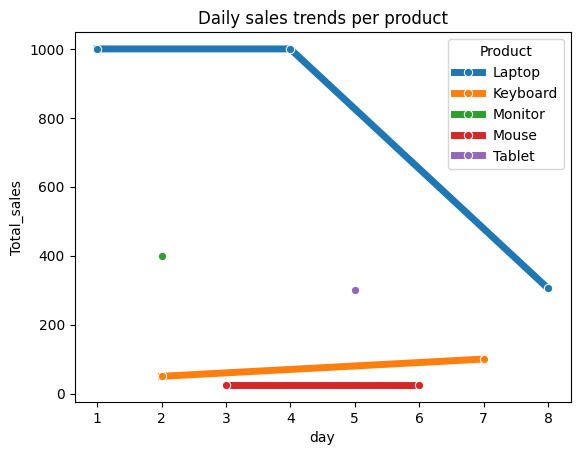

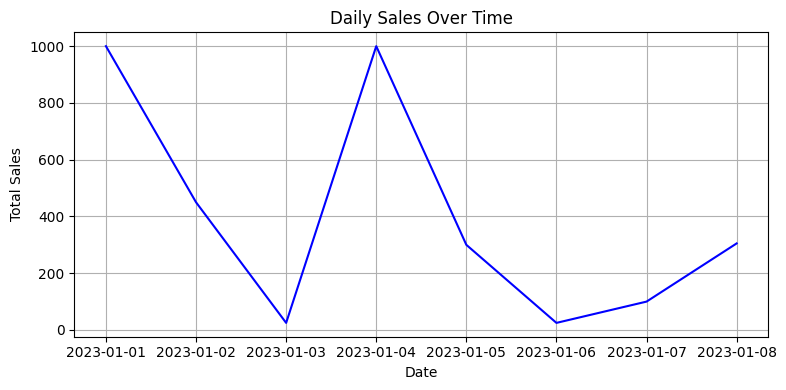

In [31]:
#What are the daily sales trends?

clean_data['Order Date'] = pd.to_datetime(clean_data['Order Date'])
clean_data['year'] = clean_data['Order Date'].dt.year
clean_data['month'] = clean_data['Order Date'].dt.month
clean_data['day'] = clean_data['Order Date'].dt.day
#print(clean_data['year'])
#print(clean_data['month'])
#print(clean_data['day'] )

daily_sales = clean_data.groupby(['day', 'Product'])['Total_sales'].sum().reset_index()



sns.lineplot(data = daily_sales, x ='day', y = 'Total_sales',linewidth = 5,marker = 'o',color = 'red',hue = 'Product')
plt.title('Daily sales trends per product')
plt.savefig('C:/Users/HOME/Desktop/python/Projects/p1/EDA_visuals/Daily_sales_trends_per_product.png')
plt.show()



# Group by date and sum sales
daily_sales = clean_data.groupby('Order Date')['Total_sales'].sum()

# Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, color='blue')

plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.savefig('C:/Users/HOME/Desktop/python/Projects/p1/EDA_visuals/Daily_Sales_Over_Time.png')
plt.show()



  Customer ID  Total_sales
0        C001       1000.0
1        C005       1000.0
2        C002        400.0


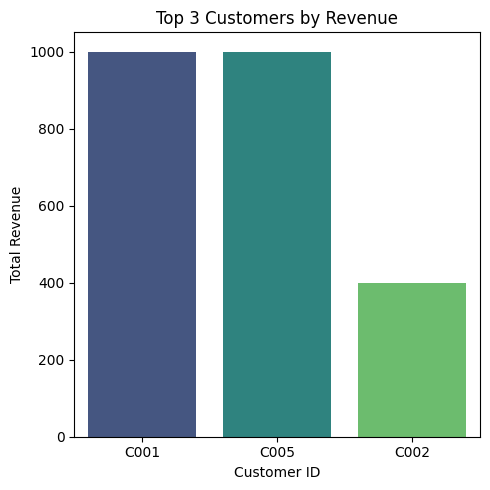

In [32]:
#Who are the top 3 customers by revenue?
#clean_data['Top_customers'] = clean_data.groupby('Customer ID')['Total_sales'].sum().nlargest(3).reset_index()
top_customers = clean_data.groupby('Customer ID')['Total_sales'].sum().nlargest(3).reset_index()

print(top_customers)

#print(clean_data['Top_customers'])

plt.figure(figsize=(5, 5))
sns.barplot(data=top_customers, x='Customer ID', y='Total_sales', palette='viridis',hue = 'Customer ID')

plt.title('Top 3 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.savefig('C:/Users/HOME/Desktop/python/Projects/p1/EDA_visuals/Top_3_Customers_by_Revenue.png')
plt.show()


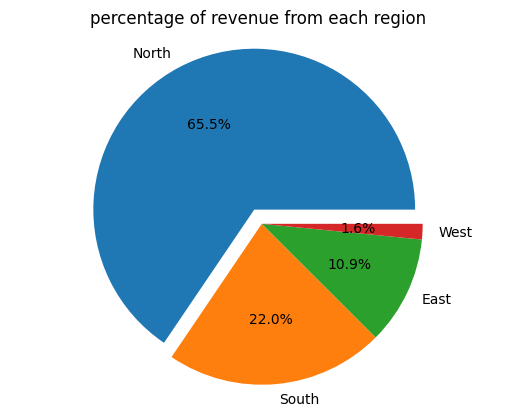

In [33]:
#Which regions generate the most revenue?
High_region = clean_data.groupby('Region')['Total_sales'].sum().sort_values(ascending = False).reset_index()
#print(High_region)

plt.pie(High_region['Total_sales'],labels = High_region['Region'],autopct = '%1.1f%%',explode = (0.1,0,0,0))
plt.title("percentage of revenue from each region")
plt.axis('equal')
plt.savefig('C:/Users/HOME/Desktop/python/Projects/p1/EDA_visuals/percentage_of_revenue_from_each_region.png')
plt.show()


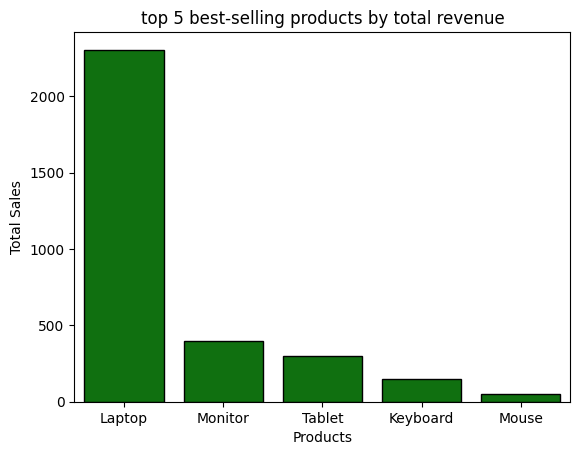

In [34]:
#What are the best-selling products and categories?
Best_products = clean_data.groupby('Product')['Total_sales'].sum().sort_values(ascending = False).reset_index()

#print(Best_products)
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.barplot(data = Best_products, x = 'Product',y = 'Total_sales',color = 'green',ec = 'k' )
plt.title("top 5 best-selling products by total revenue")
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.savefig('C:/Users/HOME/Desktop/python/Projects/p1/EDA_visuals/top_5_best_selling_products_by_total_revenue.png')
plt.show()


